## Übung 1

### Problem 1.1 Application Layer Rerouting

#### 1.1.1 Ping

##### Ausführung von Ping zu unterschiedlichen Hosts

Zu den unterschiedlichen Hosts wird jeweils n-mal ein Ping durchgeführt und die Ausgabe in ein Tupel mit dem dazugehörigen Hostnamen gespeichert.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
import subprocess

hosts = ('uni-due.de', 'whitehouse.gov', 'oceania.pool.ntp.org')
log = []
for host in hosts:
    process = subprocess.Popen(['ping', '-c', "50", host], stdout=subprocess.PIPE)
    for line in process.stdout:
        # die zeile ist ein raw string, muss also dekodiert werden
        line = line.decode('utf-8')
        # in der zeile ist bereits ein zeilenumbruch vorhanden
        print(line, end='')
        log.append((host, line))

PING uni-due.de (132.252.185.170) 56(84) bytes of data.
64 bytes from uni-due.de (132.252.185.170): icmp_seq=1 ttl=120 time=19.2 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=2 ttl=120 time=19.1 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=3 ttl=120 time=19.5 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=4 ttl=120 time=20.2 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=5 ttl=120 time=19.2 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=6 ttl=120 time=18.5 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=7 ttl=120 time=18.8 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=8 ttl=120 time=19.2 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=9 ttl=120 time=19.0 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=10 ttl=120 time=19.1 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=11 ttl=120 time=18.7 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=12 ttl=120 time=19.1 ms
64 bytes from uni-due.de (132

##### Parsen der Rohdaten

Die Angabe der Round trip time ist gegeben durch z.B. den Text `time=166 ms`. Dieser kann durch einen regulären Ausdruck aus einer Zeile gefiltert werden.

In [3]:
import re

data = []
for host, line in log:
    # Der regulaere Ausdruck findet Zeitangaben (time=) bei Bedarf durch . getrennt
    m = re.search('time=(\d+(\.\d+)?)', line)
    if m:
        groups = m.groups()
        time = float(groups[0])
        data.append((host, time))
print(data)

[('uni-due.de', 19.2), ('uni-due.de', 19.1), ('uni-due.de', 19.5), ('uni-due.de', 20.2), ('uni-due.de', 19.2), ('uni-due.de', 18.5), ('uni-due.de', 18.8), ('uni-due.de', 19.2), ('uni-due.de', 19.0), ('uni-due.de', 19.1), ('uni-due.de', 18.7), ('uni-due.de', 19.1), ('uni-due.de', 19.6), ('uni-due.de', 18.5), ('uni-due.de', 20.3), ('uni-due.de', 18.8), ('uni-due.de', 18.7), ('uni-due.de', 18.5), ('uni-due.de', 18.9), ('uni-due.de', 19.0), ('uni-due.de', 18.7), ('uni-due.de', 19.5), ('uni-due.de', 18.6), ('uni-due.de', 18.6), ('uni-due.de', 19.4), ('uni-due.de', 21.3), ('uni-due.de', 18.8), ('uni-due.de', 18.7), ('uni-due.de', 18.7), ('uni-due.de', 18.9), ('uni-due.de', 19.1), ('uni-due.de', 18.8), ('uni-due.de', 19.2), ('uni-due.de', 19.3), ('uni-due.de', 19.0), ('uni-due.de', 19.0), ('uni-due.de', 21.3), ('uni-due.de', 19.3), ('uni-due.de', 18.3), ('uni-due.de', 18.9), ('uni-due.de', 19.1), ('uni-due.de', 18.6), ('uni-due.de', 19.1), ('uni-due.de', 18.7), ('uni-due.de', 18.7), ('uni-due

##### Statistiken zum Ping

In der Aufgabenstellung war z.B. nach dem Mittelwert und der Varianz gefragt. Gerade bei der Varianz ergaben sich Schwierigkeiten. 

Wikipedia:

> Sie beschreibt die erwartete quadratische Abweichung der Zufallsvariablen von ihrem Erwartungswert.

Zum Erwartungswert ist eine entsprechende Quellenangabe vorhanden. Ansonsten ist folgendes Video zu empfehlen:
[Zufallsgröße, Erwartungswert, Faires Spiel, ...](https://www.youtube.com/watch?v=7zJ3GYBVU6Q)

Da im Beispiel alle Möglichkeiten und deren Wahrscheinlichkeit bekannt sind kann der Erwartungswert einfach bestimmt werden: $\sum_{i \in I} x_i P(X = x_i)$

Da hier aber nicht von bekannten möglichen Werten ausgegangen wird ist eine [unkorrigierte Stichprobenvarianz](https://de.wikipedia.org/wiki/Stichprobenvarianz) das Mittel der Wahl.

$s^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_i - \overline{x})^2$

In [4]:
import itertools

# Die zu gruppierenden Daten muessen zunaechst nach demselben Schluessel
# sortiert werden, siehe http://stackoverflow.com/questions/773/how-do-i-use-pythons-itertools-groupby
data = sorted(data, key=lambda t: t[0])
for host, g in itertools.groupby(data, key=lambda t: t[0]):

    rtt = [e[1] for e in g]
    max_rtt = max(rtt)
    min_rtt = min(rtt)
    
    # alternativer durchschnitt: sum(rtt) / len(rtt)
    # aber achtung vor rundungsfehlern!
    mean_rtt = np.mean(rtt) 
    
    # zur varianzberechnung siehe 
    # http://www.frustfrei-lernen.de/mathematik/varianz-berechnen.html
    variance = 1 / (len(rtt) - 1) * sum([np.power(x - mean_rtt, 2) for x in rtt])
    
    # die standardvarianz ist die wurzel der varianz
    std_deviation = np.sqrt(variance)
    
    print('              Host: %s' % host)
    print('           Max RTT: %f' % max_rtt)
    print('           Min RTT: %f' % min_rtt)
    print('  Durchschnitt RTT: %f' % mean_rtt)
    print('           Varianz: %f' % variance)
    print('Standardabweichung: %f' % std_deviation)
    print()

              Host: oceania.pool.ntp.org
           Max RTT: 44.600000
           Min RTT: 26.600000
  Durchschnitt RTT: 28.516000
           Varianz: 5.684229
Standardabweichung: 2.384162

              Host: uni-due.de
           Max RTT: 21.300000
           Min RTT: 17.000000
  Durchschnitt RTT: 19.024000
           Varianz: 0.465535
Standardabweichung: 0.682301

              Host: whitehouse.gov
           Max RTT: 450.000000
           Min RTT: 12.300000
  Durchschnitt RTT: 26.534000
           Varianz: 4294.133310
Standardabweichung: 65.529637



##### Anzeige eines Histograms

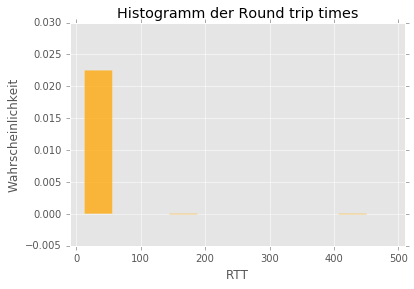

In [5]:
import matplotlib.pyplot as plt

times = [e[1] for e in data]
plt.hist(times, 10, normed=1, facecolor='orange', alpha=0.75)

plt.xlabel('RTT')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Histogramm der Round trip times')
plt.grid(True)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .005, y_max + .005))

plt.show()

##### ECDF

Zur Hilfe zu empirischen kumulativen Distributionsfunktionen haben die Wirtschaftswissenschaftler auch eine schöne Hilfe:

- https://www.youtube.com/watch?v=EtyAsjzifZU
- https://onlinecourses.science.psu.edu/stat464/node/84

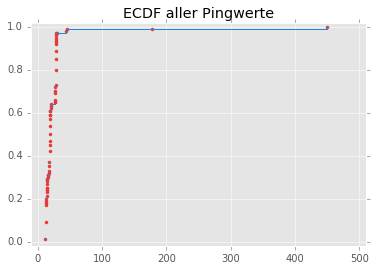

In [6]:
def ecdf(values):
    
    # 1. sortieren der werte
    values = sorted(values)

    # 2. reduzieren der werte auf eindeutigkeit
    unique_values = sorted(list(set(values)))

    # 3. ermittlung wie viele werte <= x sind fuer jede eindeutige zeit
    cumsum_values = []
    for u in unique_values:
        cumsum_values.append((u, len([1 for _ in values if _ <= u])))

    # 4. ermittlung der prozentualen anteile wie viele werte <= x sind
    y = np.round([c / len(values) for t, c in cumsum_values], decimals=2)

    # fuer jedes eindeutige x wird ein punkt dargestellt
    plt.plot(unique_values, y, color='#e53935', linestyle=' ', marker='.')

    # von x bis x + 1 wird ein einzelner strich geplottet
    for i in range(len(unique_values)):
        x_0 = unique_values[i]
        x_1 = unique_values[i + 1] if i < len(unique_values) - 1 else unique_values[i] + 1
        plt.plot([x_0, x_1], [y[i], y[i]], color='#1e88e5', linestyle='-')
        
ecdf(times)
plt.title('ECDF aller Pingwerte')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

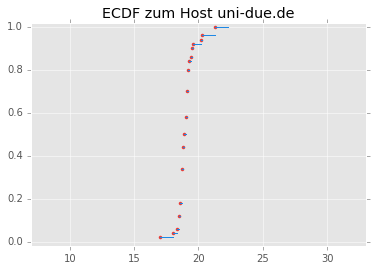

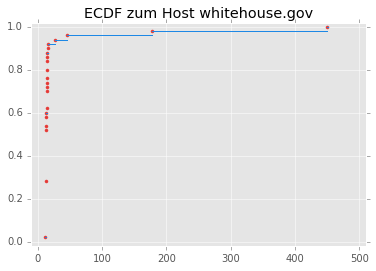

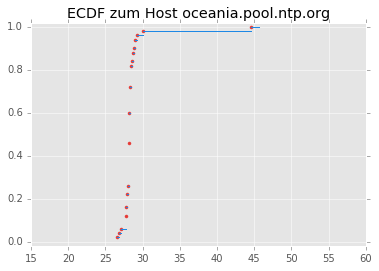

In [7]:
for host in hosts:
    times = [t for h, t in data if h == host]
    ecdf(times)
    
    plt.title('ECDF zum Host %s' % host)

    x_min, x_max, y_min, y_max = plt.axis()
    plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

    plt.show()


#### 1.1.2 Gesamtverlustwahrscheinlichkeit

Es sollte simuliert werden wie die Gesamtverlustwahrscheinlichkeit bei einer zweiteiligen Strecke mit jeweils Teilverlustwahrscheinlichkeiten von $p_{ab} = 1\%$ und $p_{bc} = 2\%$ sind. Über einen Ereignisbaum kann man sich das ganz gut bildlich vorstellen.

Insgesamt bestehen $100^2$ Möglichkeiten. Bei einer von 100 Möglichkeiten geht das Paket auf der ersten Teilstrecke verloren. Nach jeder dieser 100 Möglichkeiten gibt es noch einmal 100 Möglichkeiten in denen das Paket verloren gehen kann. Am ersten Baum gibt es eine Möglichkeit des Paketverlustes. Daraus folgen für die Gesamtverlustwahrscheinlichkeit 100 Fehlschläge. Für jede andere der 99 Möglichkeiten gibt es 2 Möglichkeiten in denen das Paket widerum verloren gehen kann.

Demzufolge ist die Gesamtwahrscheinlichkeit die Wahrscheinlichkeit der ersten Strecke (0.01) plus die Wahrscheinlichkeit der zweiten Strecke (0.02) minus der Anteil der auf der ersten Strecke eh schon in die Hose geht.

Siehe: http://www.mathematik-wissen.de/mehrstufige_zufallsexperimente.htm

Bei n Teilstrecken beträgt also die Gesamtverlustwahrscheinlichkeit immer die Teilverlustwahrscheinlichkeit des Vorgängers + diese Teilverlustwahrscheinlichkeit * (1 - Teilverlustwahrscheinlichkeit des Vorgängers)

$P(X) = \sum_{i = 1}^{n} P(x_{i}) * (1 - P(x_{i - 1}))$

wobei gilt $P(1) = P(1)$ (basiert also nicht auf dem Vorgänger)

In [8]:
import random

iterations = (100, 1000, 10000, 1000000)
loss_ab = 0.01
loss_bc = 0.02

for i in iterations:
    # 0 <= random.random() < 1
    # 1 fuer pakete, die erfolgreich sind, 0 fuer fehlschlaege
    # filterung a -> b
    pakets = [1 if random.random() >= loss_ab else 0 for x in range(0, i)]
    # filterung b -> c
    pakets = [1 if random.random() >= loss_bc and p else 0 for p in pakets]
    
    print('Verlust: {:3.4f}% bei {:8d} Paketen'.format((1 - float(sum(pakets)) / i) * 100, i))
    
print('\nBei einem kalkulierten Verlust von: {:3.4f}%'.format((0.01 + 0.02 * (1 - 0.01)) * 100))
    

Verlust: 4.0000% bei      100 Paketen
Verlust: 2.0000% bei     1000 Paketen
Verlust: 3.5000% bei    10000 Paketen
Verlust: 2.9831% bei  1000000 Paketen

Bei einem kalkulierten Verlust von: 2.9800%


Sollten n beliebige Strecken mit gegebenen Verlustwahrscheinlichkeiten gegeben sein, kann die folgende Methode verwendet werden:

In [9]:
def loss(p_i):
    p_i = list(p_i)
    if len(p_i) < 2:
        return p_i[0]
    
    _p = []
    # P(0) hinzufuegen
    _p.append(p_i[0])
    
    for i in range(1, len(p_i)):
        # alle anderen wahrscheinlichkeiten basieren auch auf dem vorgaenger
        _p.append(p_i[i] * (1 - sum(_p)))
        
    return sum(_p)

print(loss((0.01, 0.02)))
print(loss((0.5, 0.4, 0.3, 0.2)))

0.0298
0.832


#### 1.1.3 Verzögerungen und Vergleiche untereinander

Es sollen exponentiell verteilte Werte in Abhängigkeit von einem gegebenen Mittelwert generiert und in einer CDF dargestellt werden. Diese Werte lassen sich mit Hilfe der Funktion $R_e = -\mu * log(R_u)$ generieren.

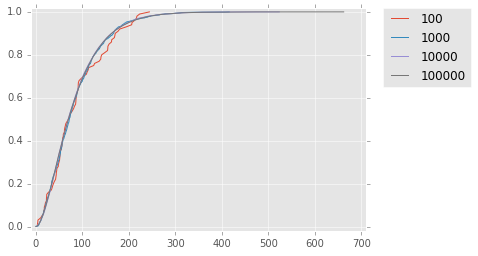

In [10]:
import math
import random
    
mu_ab = 42
mu_bc = 42
counts = (100, 1000, 10000, 100000)
delay = {
    'ab': [],
    'bc': []
}
data = []
# fuer jede teilstrecke werden zufallswerte bestimmt
# Beispiel: delay['ab'] = [[1.0, 42.3, 60.1, 34.3], [...], [...], [..]] (numpy array!)
for count in counts:
    delay['ab'].append(np.array([-mu_ab * math.log(random.uniform(0, 1)) for i in range(0, count)]))
    delay['bc'].append(np.array([-mu_bc * math.log(random.uniform(0, 1)) for i in range(0, count)]))
    

# In Python werden arrays durch addition zusammengefuegt
# [1, 2] + [3, 4] = [1, 2, 3, 4]
# es soll aber jede verzoegerung a -> b -> c addiert werden, daher werden
# numpy arrays verwendet.
# np.array([1, 2]) + np.array([3, 4]) = [4, 6]
# Beispiel: data = [([1.0, 42.3, 60.1, 34.3], 100), [...], [...], [..]]
# ..Liste von 2-Tupeln bestehend aus einem numpy array und dem dazugehoerigen label
data = [(delay['ab'][i] + delay['bc'][i], counts[i]) for i in range(0, len(counts))]

for values, label in data:
    # sortieren der werte zur darstellung als cdf
    xs = sorted(values)
    # erstellen der gleichmaeszigen werte fuer die y-achse
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    
    plt.plot(xs, ys, label=label)

# hinzufuegen einer legende. label muss vorher durch plt.plot gegeben sein
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

Zur Veranschaulichung werden die Daten noch einmal als Histogramm dargestellt.

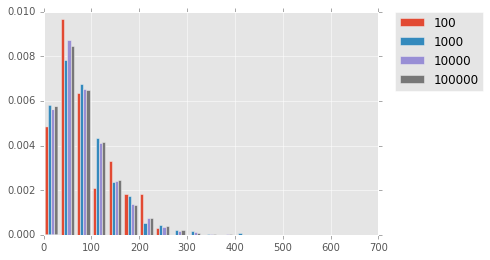

In [11]:
import math
import random
    
plt.hist([d[0] for d in data], bins=20, normed=True, label=[d[1] for d in data])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

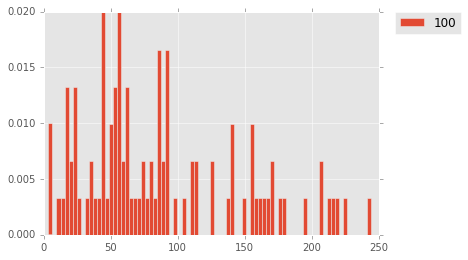

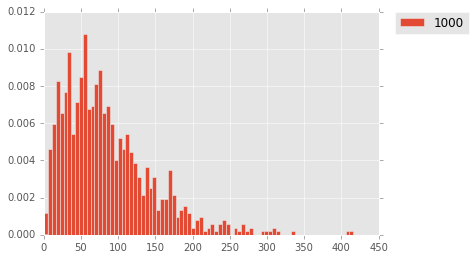

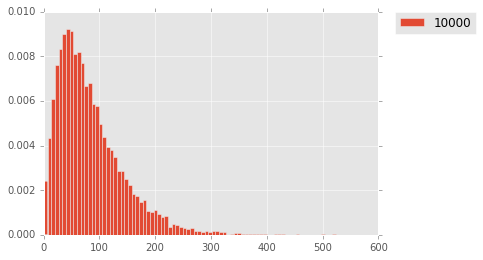

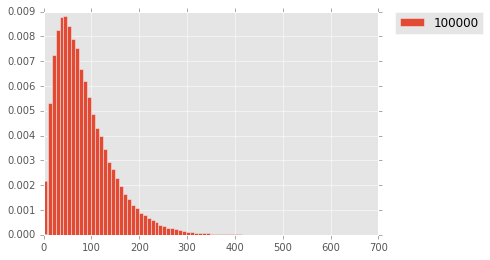

In [12]:
for i in range(0, len(counts)):
    xs, label = delay['ab'][i] + delay['bc'][i], str(counts[i])
    plt.hist(xs, bins=80, normed=True, label=label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

##### Vergleich mit einer Erlangverteilung

Die Verteilungsfunktion der Erlangverteilung ist: $P(D_{ABC} \leq x) = 1 - e^{-gx}(1 + gx)$ mit $g = \frac{1}{\mu_{AB}}$

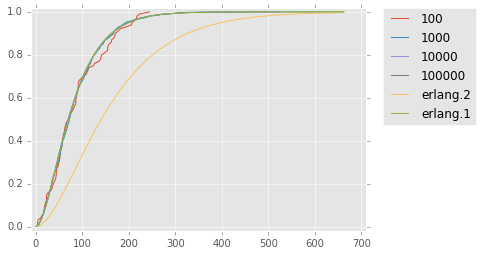

In [13]:
# plotten der werte wie zuvor zum vergleich mit den erlang verteilungen
for values, label in data:
    xs = sorted(values)
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    
    plt.plot(xs, ys, label=label)

# erzeugen der gleichmaeszigen x werte fuer die erlang verteilung <=> min <= x <= max
# des letzten elementes
e_x = np.linspace(min(data[-1][0]), max(data[-1][0]), len(data[-1][0]))
e_y = {
    'erlang.1': [1 - math.exp(-1 / mu_ab * i) * (1 + 1 / mu_ab * i) for i in e_x],
    'erlang.2': [1 - math.exp(-1 / (2 * mu_ab) * i) * (1 + 1 / (2 * mu_ab) * i) for i in e_x]
}

for label in e_y:
    plt.plot(e_x, e_y[label], label=label)

# hinzufuegen einer legende. label muss vorher durch plt.plot gegeben sein
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

#### 1.1.4

##### Frage 1

- Versendung von Sequenznummern mit den Paketen, die nach der Rücksendung verglichen werden

##### Frage 2

- Verfügbare Bandbreite
- Anzahl der Verbindungen zu anderen Knoten
- Resourcenkapazität
- Uptime des Rechners
- mobile Knoten (Akku betrieben)

##### Frage 3

- Regelung der Bandbreite
- Ermittlung von neuen Supernodes
- Paketweiterleitung *am Nutzer vorbei*

##### Frage 4

Supernodes bilden ein Overlay, da Sie den Datenverkehr an die Klienten regeln und anderen Supernode bekannt sind. Erst durch Supernodes wird das eigentlich Netz realisiert.


##### ECDF-Beispiel

Siehe [Wikipedia Empirische Verteilungsfunktion](https://de.wikipedia.org/wiki/Verteilungsfunktion#Empirische_Verteilungsfunktion>)

Ausgangsdaten:
6, 2, 7, 12, 1, 11, 1, 1, 2, 3

sort:
1, 1, 1, 2, 2, 3, 6, 7, 11, 12

table:

1  2  3  6  7  11  12
3  2  1  1  1  1   1

cumsum   3  5  6  7  8  9   10
/10      .3 .5 .6 .7 .8 .9  .10



### Problem 1.2 Replikation von Sprach- und Datenpaketen und QoE

#### 1.2.1 Sprachverlustrate - Paketverlustrate

Es soll die Sprachsample-Verlustrate $p_{voice}$ in Abhängigkeit der Paketverlustrate $p_{loss}$ für die Replikationsgrade $R = 1, 2, 3, 4$ dargestellt werden. Im Skript ist das auf Folie 16 - 18 dargestellt. Hier kann auch die Formel verwendet werden: $p_{voice} = p_{loss}^R$. Für die Paketverlustrate $p_{loss}$ werden Werte von 0% bis 100% verwendet.

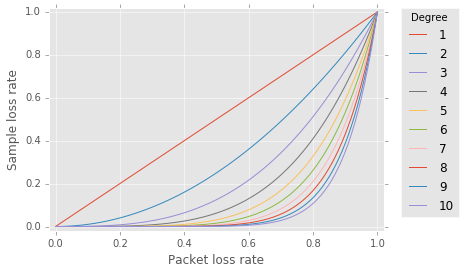

In [14]:
# plr = packet loss rate
p_loss = np.linspace(0., 1., 100)
# replikationsgrade
degrees = [d for d in range(1, 11)]

for degree in degrees:
    p_voice = p_loss ** degree
    plt.plot(p_loss, p_voice, label=str(degree))

# legende hinzufuegen
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Degree')

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .02, x_max + .02, y_min - .02, y_max + .02))

plt.ylabel('Sample loss rate')
plt.xlabel('Packet loss rate')

plt.show()

#### 1.2.2 MOS - Paketverlustrate

Mit der zuvor berechneten Sprachverlustrate lässt sich der $MOS(p_{voice})$ bestimmen ( $MOS(x) = 4 e^{-4.2 * x} + 1$ - siehe Aufgabenstellung). Bereits bei einer Replikationsrate von 2 lässt sich eine erhebliche Verbesserung feststellen.

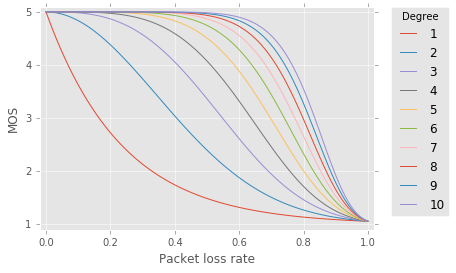

In [15]:
import math

for degree in degrees:
    p_voice = p_loss ** degree
    mos = [4 * math.exp(-4.2 * x) + 1 for x in p_voice]
    plt.plot(p_loss, mos, label=str(degree))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Degree')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .02, x_max + .02, y_min - .1, y_max + .1))

plt.ylabel('MOS')
plt.xlabel('Packet loss rate')

plt.show()

#### 1.2.3

Es soll zunächst die Verzögerung der empfangenen Sprachsamples bestimmt werden. Alle 20ms wird ein Paket mit einer konstanten Verzögerung von 13ms versendet. Hierzu ist vor allem die Folie 16 zur Veranschaulichung hilfreich. 

In [16]:
import random

packet_count = 100000
degree = 4
loss = 0.09
packet_time_delta = 20
delay_sender_receiver = 13

# Jedes Paket kommt an
packets = []
sample_delay = [0 for x in range(packet_count)]

for i in range(packet_count):
    packets.append(random.uniform(0, 1) > loss)

loss_without_rep = sum([1 for x in packets if not x]) / float(packet_count) * 100
print('Paketverlust ohne Replikation: {:.3f}%'.format(loss_without_rep))

Paketverlust ohne Replikation: 9.045%
